In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

#Defining in hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 5

#Preparing the data
transform =  transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.137,),(0.3081))  #mean and std of mnist images
])

train_set = datasets.MNIST(root = './data', train = True, download = True , transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 342kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.43MB/s]


In [3]:
#Designing ANN
class SimpleANN(nn.Module):
  def __init__(self):
    super(SimpleANN,self).__init__()
    self.flatten = nn.Flatten()
    self.fc_layers = nn.Sequential(

        nn.Linear(784,128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self,x):
    x = self.flatten(x) #encoding into single vector
    logits = self.fc_layers(x)
    return logits

model = SimpleANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr =learning_rate)

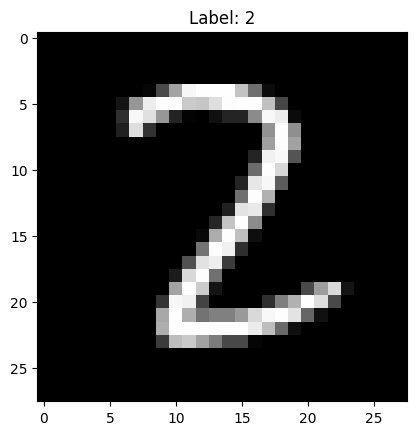

In [4]:
# Plotting Samples
images, labels = next(iter(train_loader))
plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()

In [5]:
#Training
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} complete.")

Epoch 1 complete.
Epoch 2 complete.
Epoch 3 complete.
Epoch 4 complete.
Epoch 5 complete.


In [6]:
correct = 0
with torch.no_grad():
  for data,target in test_loader:
    output = model(data)
    pred = output.argmax(dim=1,keepdim=True)
    correct += pred.eq(target.view_as(pred)).sum().item()

print(f"\nTest Accuracy: {100. * correct / len(test_loader.dataset)}%")


Test Accuracy: 97.36%
